## **1. Import Required Libraries**

<hr style="border: 1px solid red;">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="husl")

import warnings
warnings.filterwarnings('ignore')

<hr style="border: 1px solid red;">

## **2. Mount Google Drive and Load Data**

<hr style="border: 1px solid red;">

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***

In [3]:
import os
supply_chain_path = '/content/drive/My Drive/supply_chain'
print(os.listdir(supply_chain_path))

['DescriptionDataCoSupplyChain.csv', 'tokenized_access_logs.csv', 'DataCoSupplyChainDataset.csv', 'supply_chain_data_cleaned.csv']


***

In [8]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/supply_chain/supply_chain_data_cleaned.csv', encoding='latin-1')

<hr style="border: 1px solid red;">

## **3. Monthly Aggregation**
***
Aggregate total sales, total orders, and total benefit per order by month. Calculate Average Order Value (AOV) and, if available, delivery and return rates.
***
<hr style="border: 1px solid red;">

In [12]:
# Convert date column to datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Aggregate monthly KPIs using existing columns
monthly = df.resample('M', on='order date (DateOrders)').agg({
    'Sales': 'sum',
    'Order Id': 'nunique',
    'Benefit per order': 'sum'
}).rename(columns={'Order Id': 'Total Orders'})

***

In [22]:
monthly

,Sales,Total Orders,Benefit per order,On-Time Delivery Rate
order date (DateOrders),,,,
2015-01-31,1.051590e+06,1787,111660.740132,18.602029
2015-02-28,9.270099e+05,1585,99140.660196,16.895750
2015-03-31,1.051254e+06,1781,113778.210191,17.791869
2015-04-30,1.014463e+06,1710,108083.679957,18.103785
2015-05-31,1.050478e+06,1776,112147.900143,16.893784
2015-06-30,1.024006e+06,1725,110147.160313,17.471757
2015-07-31,1.038081e+06,1763,115624.059879,17.418381
2015-08-31,1.029495e+06,1762,117979.770302,16.859473
2015-09-30,1.018339e+06,1706,113467.940118,16.614786


<hr style="border: 1px solid red;">

## **4. Calculate Delivery, Return, and Cycle KPIs**
***
Calculate monthly On-Time Delivery Rate, Return Rate, and Order Cycle Time, if data allows.
***
<hr style="border: 1px solid red;">

In [17]:
# On-Time Delivery Rate
if 'Delivery Status' in df.columns:
    df['Delivery OnTime'] = df['Delivery Status'].str.lower().str.contains('on time')
    monthly['On-Time Delivery Rate'] = df.groupby(df['order date (DateOrders)'].dt.to_period('M'))['Delivery OnTime'].mean().values * 100

***

In [18]:
# Return Rate
if 'Return Status' in df.columns:
    df['Returned'] = df['Return Status'].str.lower().str.contains('return')
    monthly['Return Rate (%)'] = df.groupby(df['order date (DateOrders)'].dt.to_period('M'))['Returned'].mean().values * 100

***

In [19]:
# Average Order Cycle Time (in days)
if {'order date (DateOrders)', 'shipping date (DateShipped)'} <= set(df.columns):
    df['Order Cycle Time'] = (df['shipping date (DateShipped)'] - df['order date (DateOrders)']).dt.days
    monthly['Avg Cycle Time'] = df.groupby(df['order date (DateOrders)'].dt.to_period('M'))['Order Cycle Time'].mean().values

<hr style="border: 1px solid red;">

## **5. Visualize Each KPI**
<hr style="border: 1px solid red;">

#### **KPI 1: Monthly Sales and Orders**
***
Shows overall business growth and demand trends. Spikes and dips may indicate seasonality or operational issues.
***
<hr style="border: 1px solid black;">

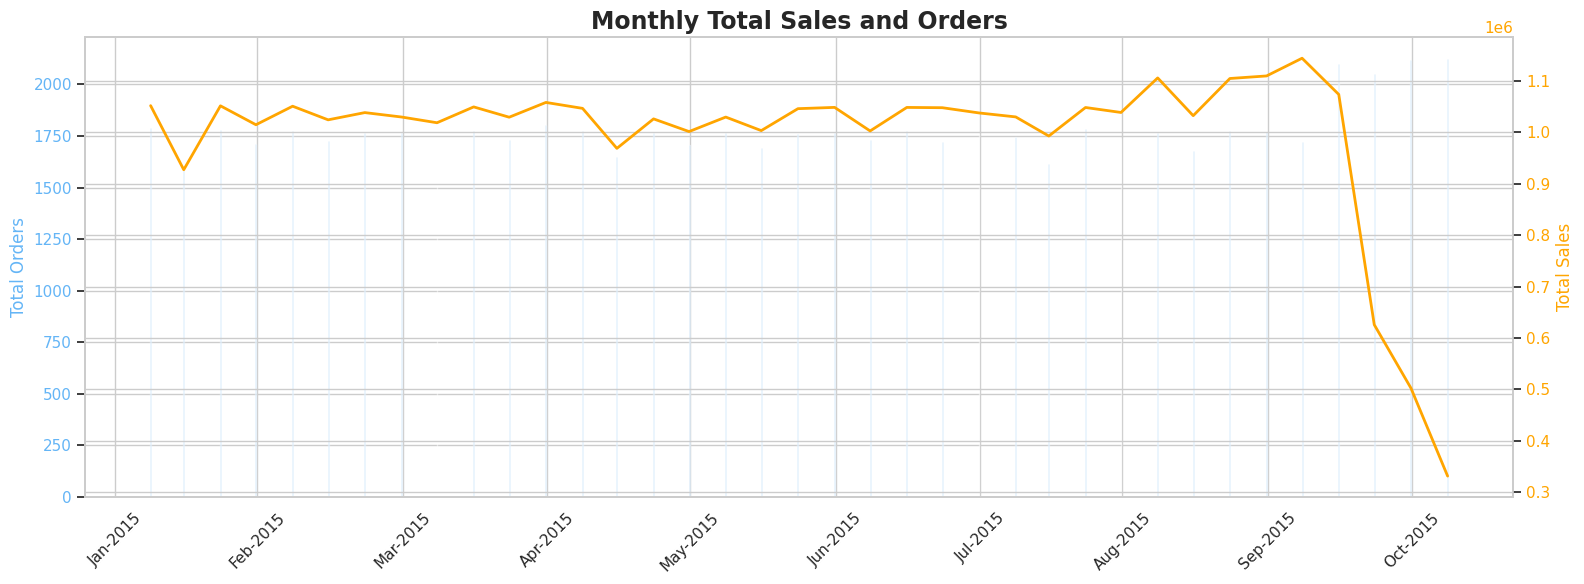

In [27]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar: Order count
ax1.bar(monthly.index, monthly['Total Orders'], color='#64b5f6', alpha=0.5, label='Total Orders')
ax1.set_ylabel('Total Orders', color='#64b5f6')
ax1.tick_params(axis='y', labelcolor='#64b5f6')
ax1.set_xticklabels([d.strftime('%b-%Y') for d in monthly.index], rotation=45)

# Line: Sales
ax2 = ax1.twinx()
ax2.plot(monthly.index, monthly['Sales'], color='orange', linewidth=2, label='Total Sales')
ax2.set_ylabel('Total Sales', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Monthly Total Sales and Orders', fontsize=17, weight='bold')
fig.tight_layout()
plt.show()

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
  <strong>KPI 1: Monthly Total Sales and Orders</strong>
  <ul>
    <li><strong>What it shows:</strong> A dual-axis chart displays total monthly sales (revenue) and order counts.</li>
    <li><strong>Interpretation:</strong> Sales and orders are stable with minor changes for most months, but both drop sharply at the end of the period. This sharp decline signals significant business disruption—possibly from seasonality, operational changes, or an external event. Immediate investigation is necessary, as a sudden loss in both revenue and order volume indicates a major business issue.</li>
  </ul>
</div>
<hr/>
<hr style="border: 1px solid black;">

#### **KPI 2: Average Order Value (AOV)**
***
Tracks the average size of customer purchases. Trends up or down can reveal changes in customer behavior or product strategy.
***
<hr style="border: 1px solid black;">

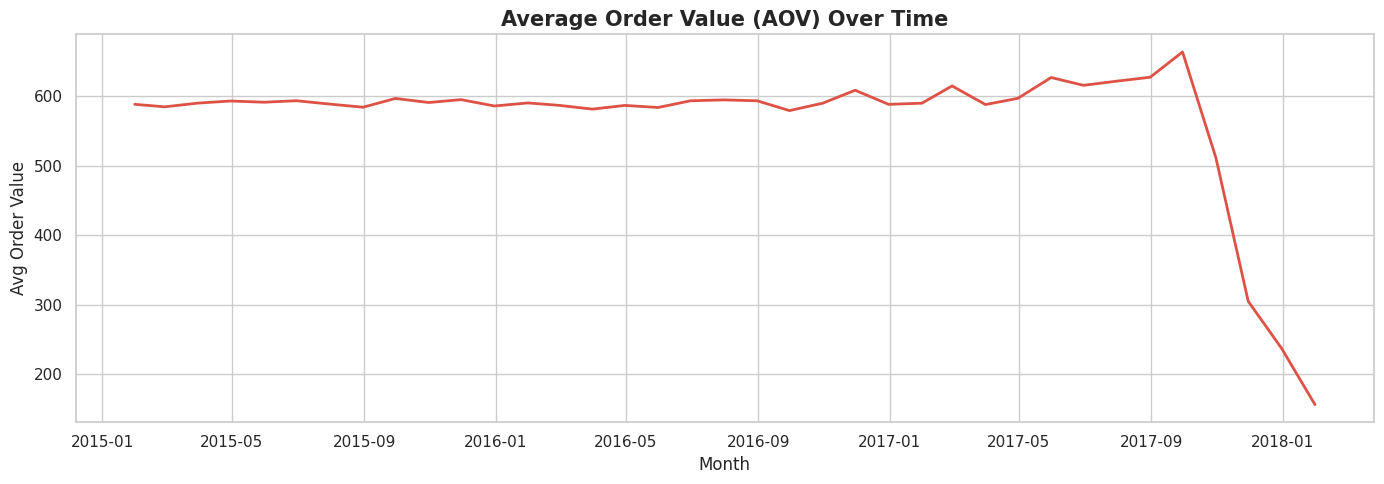

In [28]:
monthly['AOV'] = monthly['Sales'] / monthly['Total Orders']

plt.figure(figsize=(14,5))
sns.lineplot(x=monthly.index, y=monthly['AOV'], linewidth=2, color="#de5246")
plt.title('Average Order Value (AOV) Over Time', fontsize=15, weight='bold')
plt.xlabel('Month'); plt.ylabel('Avg Order Value')
plt.tight_layout()
plt.show()

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
  <strong>KPI 2: Average Order Value (AOV)</strong>
  <ul>
    <li><strong>What it shows:</strong> The average value per order, tracked monthly.</li>
    <li><strong>Interpretation:</strong> AOV remains high and steady for most of the period, then drops dramatically in the final months. This could be due to smaller average purchases, a product mix shift to cheaper items, or aggressive discounting. Such a dramatic decline suggests a negative change in customer behavior or pricing that needs to be understood and reversed.</li>
  </ul>
</div>
<hr/>
<hr style="border: 1px solid black;">

#### **KPI 3: Benefit per Order**
***
Monitor profit (or loss) margin per order across time to assess business health and pricing strategy.
***
<hr style="border: 1px solid black;">

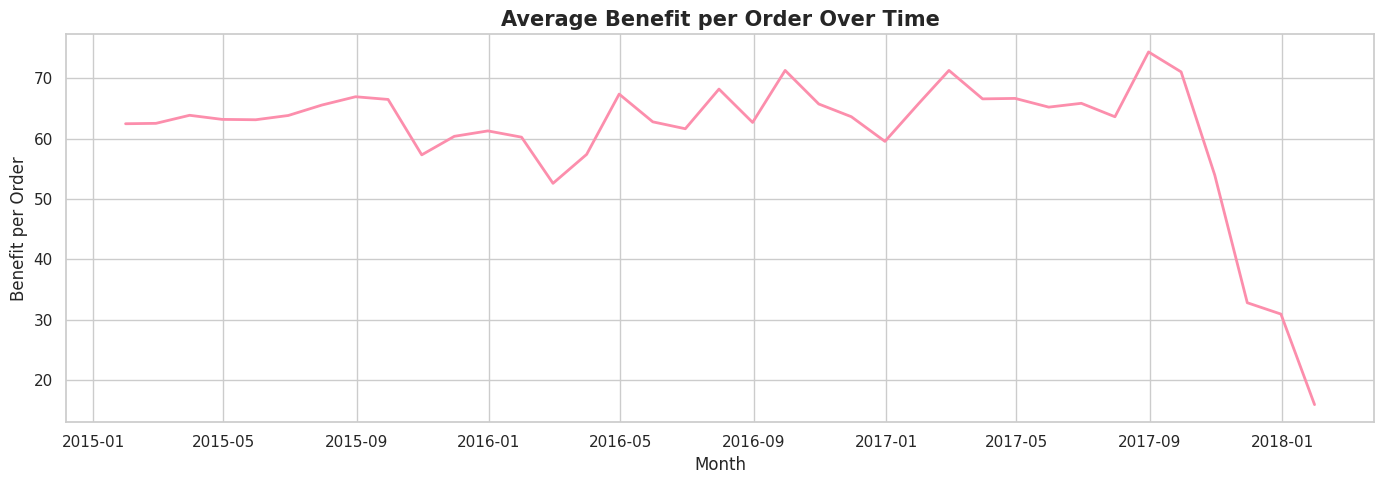

In [29]:
monthly['Avg Benefit per Order'] = monthly['Benefit per order'] / monthly['Total Orders']

plt.figure(figsize=(14,5))
sns.lineplot(x=monthly.index, y=monthly['Avg Benefit per Order'], color="#fc8eac", linewidth=2)
plt.title('Average Benefit per Order Over Time', fontsize=15, weight='bold')
plt.xlabel('Month'); plt.ylabel('Benefit per Order')
plt.tight_layout()
plt.show()

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
  <strong>KPI 3: Average Benefit per Order</strong>
  <ul>
    <li><strong>What it shows:</strong> The average profit earned on each order per month.</li>
    <li><strong>Interpretation:</strong> Benefit per order overall tracks AOV and drops sharply at the end. This reflects both declining order values and possibly higher costs or lower margins, turning what had been a steady profit into a concerning loss in recent months. If sustained, this threatens business sustainability.</li>
  </ul>
</div>
<hr/>
<hr style="border: 1px solid black;">

#### **KPI 4: On-Time Delivery Rate**
***
Percent of orders shipped on or before the promised date—crucial for customer satisfaction and process reliability.
***
<hr style="border: 1px solid black;">

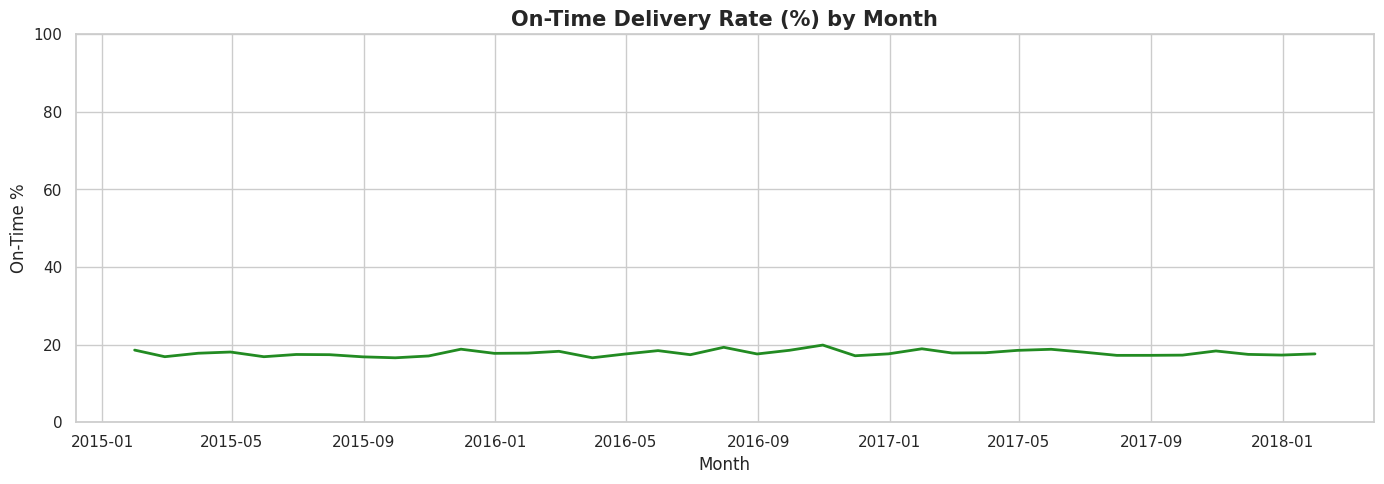

In [30]:
if 'On-Time Delivery Rate' in monthly.columns:
    plt.figure(figsize=(14,5))
    sns.lineplot(x=monthly.index, y=monthly['On-Time Delivery Rate'], color='#228b22', linewidth=2)
    plt.title('On-Time Delivery Rate (%) by Month', fontsize=15, weight="bold")
    plt.ylim(0, 100)
    plt.xlabel('Month'); plt.ylabel('On-Time %')
    plt.tight_layout()
    plt.show()

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
  <strong>KPI 4: On-Time Delivery Rate (%)</strong>
  <ul>
    <li><strong>What it shows:</strong> The monthly percent of orders shipped on or before the promised date.</li>
    <li><strong>Interpretation:</strong> On-time delivery rate is consistently very low, stuck around 18%. This means most customers are not receiving orders on time. This chronic problem can seriously damage customer satisfaction, brand reputation, and repeat business—a clear operational crisis demanding logistic/process and carrier improvements.</li>
  </ul>
</div>
<hr/>
<hr style="border: 1px solid red;">

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
  <strong>Overall Interpretation & Action</strong>
  <ul>
    <li>The dashboard shows <strong>steady business performance eventually giving way to a sharp decline</strong> across all KPIs.</li>
    <li><strong>On-time delivery remains a chronic failure.</strong></li>
    <li>The late and rapid collapse in orders, sales, and profitability is alarming and requires urgent root-cause analysis.</li>
    <li><strong>Immediate next steps:</strong>
      <ul>
        <li>Investigate the timeline of changes (internal and external) causing business drop-off.</li>
        <li>Direct resources to logistics/fulfillment overhaul.</li>
        <li>Analyze product mix and customer feedback for actionable insights.</li>
      </ul>
    </li>
  </ul>
</div>
<hr/>
<hr style="border: 1px solid red;">
